In [130]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.window import Window
import pandas as pd
from pyspark.sql.functions import translate
import pyspark.sql.functions as F
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [131]:
spark = (SparkSession.builder.appName("siddhant_cap")\
        .config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083")\
        .enableHiveSupport().getOrCreate())

In [132]:
spark

In [133]:
spark.sql("use siddhantlab").show()
spark.sql("show tables").show()

++
||
++
++

+-----------+------------+-----------+
|   database|   tableName|isTemporary|
+-----------+------------+-----------+
|siddhantlab| departments|      false|
|siddhantlab|    dept_emp|      false|
|siddhantlab|dept_manager|      false|
|siddhantlab|   employees|      false|
|siddhantlab|  emp_tenure|      false|
|siddhantlab|    salaries|      false|
|siddhantlab|      tenure|      false|
|siddhantlab|      titles|      false|
+-----------+------------+-----------+



# Exploratory Data Analysis

### 1. A list showing employee number, last name, first name, sex, and salary for each employee

In [5]:
spark.sql("SELECT EM.emp_no, EM.last_name, EM.first_name, EM.sex, SAL.salary\
           FROM employees EM LEFT JOIN salaries SAL\
           ON EM.emp_no = SAL.emp_no").show()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
+------+----------+----------+---+------+
|emp_no| last_name|first_name|sex|salary|
+------+----------+----------+---+------+
|473302|  Zallocco|  Hideyuki|  M| 40000|
|475053| Delgrande|     Byong|  F| 53422|
| 57444|      Babb|     Berry|  F| 48973|
|421786|  Verhoeff|     Xiong|  M| 40000|
|282238|   Baumann|Abdelkader|  F| 40000|
|263976|  Cusworth|      Eran|  M| 40000|
|273487|   Parfitt| Christoph|  M| 56087|
|461591|  Samarati|    Xudong|  M| 40000|
|477657| Magliocco|    Lihong|  M| 54816|
|219881|     Speek| Kwangyoen|  F| 40000|
| 29920|     Tyugu|   Shuichi|  F| 40000|
|208153|      Lunn|   Abdulah|  M| 50183|
| 13616|     Lorho|     Perry|  F| 40000|
|246449|Bultermann|     Subbu|  F| 87084|
| 21529|  Zallocco|     Bojan|  M| 40000|
| 17934|  Wuwongse|  Bilhanan|  M| 48795|
| 48085|      Gilg|Venkatesan|  M| 63016|
|239838|     Dulli

### 2. A list showing first name, last name, and hire date for employees who were hired in 1986.

In [6]:
spark.sql("SELECT first_name,last_name,hire_date FROM employees WHERE  substr(hire_date,1,4) = '1986'").show()

+----------+-----------+----------+
|first_name|  last_name| hire_date|
+----------+-----------+----------+
|      Eran|   Cusworth|1986-11-14|
|     Bojan|   Zallocco|1986-10-14|
|     Nevio|     Demizu|1986-05-18|
|      Ziva|     Vecchi|1986-03-07|
|     Mohit|      Speek|1986-01-14|
|  Qunsheng|      Speer|1986-02-13|
|     Dines|Encarnacion|1986-02-08|
|  Harngdar|      Swick|1986-05-28|
|    Freyja|      Uhrig|1986-12-20|
|   Zhenhua|    Milicic|1986-04-08|
|     Bowen|   Schmezko|1986-05-30|
|    Reuven|      Munke|1986-04-13|
| Stabislas|    Domenig|1986-04-08|
| Juichirou|   Jumpertz|1986-09-18|
| Juichirou|     Ghelli|1986-12-13|
|    Shmuel|      Georg|1986-11-30|
|   Xiadong|       Bach|1986-04-29|
| Guangming|Butterworth|1986-01-10|
|     Irene|      Setia|1986-10-08|
|   Shuichi|     Swiler|1986-08-06|
+----------+-----------+----------+
only showing top 20 rows



### 3. A list showing the manager of each department with the following information: department number, department name, the manager's employee number, last name, first name.

In [7]:
spark.sql("SELECT DPT.dept_no,DM.emp_no,EMP.last_name,EMP.first_name FROM departments DPT\
           INNER JOIN dept_manager  DM\
           ON DPT.dept_no = DM.dept_no\
           INNER JOIN employees EMP\
           ON DM.emp_no = EMP.emp_no").show()

+-------+------+------------+-----------+
|dept_no|emp_no|   last_name| first_name|
+-------+------+------------+-----------+
|   d009|111877|    Spinelli|    Xiaobin|
|   d008|111534|      Kambil|     Hilary|
|   d006|110765|     Hofmeyr|     Rutger|
|   d004|110420|    Ghazalie|      Oscar|
|   d006|110725|     Onuegbe|  Peternela|
|   d001|110022|  Markovitch|  Margareta|
|   d007|111035|   Kaelbling|Przemyslawa|
|   d005|110511|    Hagimont|   DeForest|
|   d005|110567|    DasSarma|       Leon|
|   d003|110183|Ossenbruggen|    Shirish|
|   d009|111939|     Weedman|    Yuchang|
|   d002|110114|  Legleitner|      Isamu|
|   d006|110854|       Pesch|       Dung|
|   d001|110039|    Minakawa|   Vishwani|
|   d006|110800|     Quadeer|     Sanjoy|
|   d003|110228|     Sigstam|    Karsten|
|   d004|110303|     Wegerle|  Krassimir|
|   d004|110344|       Cools|     Rosine|
|   d009|111692| Butterworth|      Tonny|
|   d008|111400|     Staelin|       Arie|
+-------+------+------------+-----

### 4. A list showing the department of each employee with the following information: employee number, last name, first name, and department name.

In [8]:
spark.sql("SELECT DE.emp_no, EMP.last_name,EMP.first_name,DPT.dept_name FROM departments DPT\
           INNER JOIN dept_emp DE\
           ON DPT.dept_no = DE.dept_no\
           INNER JOIN employees EMP\
           ON DE.emp_no = EMP.emp_no").show()

+------+-----------+----------+--------------------+
|emp_no|  last_name|first_name|           dept_name|
+------+-----------+----------+--------------------+
| 10001|    Facello|    Georgi|       "development"|
| 10002|     Simmel|   Bezalel|             "Sales"|
| 10003|    Bamford|     Parto|        "Production"|
| 10004|    Koblick| Chirstian|        "Production"|
| 10005|   Maliniak|   Kyoichi|   "Human Resources"|
| 10006|    Preusig|    Anneke|       "development"|
| 10007|  Zielinski|   Tzvetan|          "Research"|
| 10008|   Kalloufi|    Saniya|       "development"|
| 10009|       Peac|    Sumant|"Quality Management"|
| 10010|   Piveteau| Duangkaew|        "Production"|
| 10010|   Piveteau| Duangkaew|"Quality Management"|
| 10011|      Sluis|      Mary|  "Customer Service"|
| 10012|  Bridgland|  Patricio|       "development"|
| 10013|     Terkki| Eberhardt|   "Human Resources"|
| 10014|      Genin|     Berni|       "development"|
| 10015|  Nooteboom|  Guoxiang|          "Rese

### 5. A list showing first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B.“

In [9]:
spark.sql("SELECT first_name,last_name ,sex FROM employees WHERE first_name = 'Hercules' AND last_name LIKE('B%')").show()

+----------+-------------+---+
|first_name|    last_name|sex|
+----------+-------------+---+
|  Hercules|         Baer|  M|
|  Hercules|        Biron|  F|
|  Hercules|        Birge|  F|
|  Hercules|      Berstel|  F|
|  Hercules|    Bernatsky|  M|
|  Hercules|         Bail|  F|
|  Hercules|       Bodoff|  M|
|  Hercules|     Benantar|  F|
|  Hercules|      Basagni|  M|
|  Hercules|Bernardinello|  F|
|  Hercules|   Baranowski|  M|
|  Hercules|      Bisiani|  F|
|  Hercules|   Benzmuller|  M|
|  Hercules|         Bahr|  M|
|  Hercules|        Biran|  F|
|  Hercules|         Bain|  F|
|  Hercules|      Brendel|  F|
|  Hercules|      Buchter|  M|
|  Hercules|     Barreiro|  M|
|  Hercules|         Baak|  M|
+----------+-------------+---+



### 6. A list showing all employees in the Sales department, including their employee number, last name, first name, and department name.

In [13]:
spark.sql("SELECT EMP.emp_no,EMP.last_name,EMP.first_name,DPT.dept_name FROM employees EMP LEFT JOIN dept_emp DE ON EMP.emp_no = DE.emp_no LEFT JOIN departments DPT ON DE.dept_no = DPT.dept_no WHERE DPT.dept_name = '\"Sales\"'").show()

+------+-------------+----------+---------+
|emp_no|    last_name|first_name|dept_name|
+------+-------------+----------+---------+
|246449|   Bultermann|     Subbu|  "Sales"|
|205246|       Demizu|     Nevio|  "Sales"|
|476443|       Asmuth|      Ziya|  "Sales"|
|424270|    Yoshizawa|    Kellyn|  "Sales"|
|280408|         Perl|   Elliott|  "Sales"|
|289261|     Nollmann|       Gad|  "Sales"|
|444985|     Verspoor|      Giap|  "Sales"|
|477628|Beutelspacher|      Duro|  "Sales"|
| 42625|        Swick|  Harngdar|  "Sales"|
| 85093|       Covnot| Nectarios|  "Sales"|
|205366|    Shimshoni|  Kazuhira|  "Sales"|
| 37601|    Naumovich|   Gilbert|  "Sales"|
|437985|        Munke|    Reuven|  "Sales"|
| 28823|     Skafidas|     Tonny|  "Sales"|
|107258|       Zaumen|    Parviz|  "Sales"|
| 11980|         Pews| Yechezkel|  "Sales"|
|457800|      Domenig| Stabislas|  "Sales"|
|414537|     Businaro|   Chikara|  "Sales"|
|414885|       Vecchi|   Candido|  "Sales"|
|217945|        Georg|    Shmuel

### 7. A list showing all employees in the Sales and Development departments, including their employee number, last name, first name, and department name.

In [15]:
spark.sql("""SELECT EMP.emp_no,EMP.last_name,EMP.first_name,DPT.dept_name FROM employees EMP LEFT JOIN dept_emp DE ON EMP.emp_no = DE.emp_no LEFT JOIN departments DPT ON DE.dept_no = DPT.dept_no WHERE DPT.dept_name IN('"Sales"','"Development"')""").show()

+------+-------------+----------+---------+
|emp_no|    last_name|first_name|dept_name|
+------+-------------+----------+---------+
|246449|   Bultermann|     Subbu|  "Sales"|
|205246|       Demizu|     Nevio|  "Sales"|
|476443|       Asmuth|      Ziya|  "Sales"|
|424270|    Yoshizawa|    Kellyn|  "Sales"|
|280408|         Perl|   Elliott|  "Sales"|
|289261|     Nollmann|       Gad|  "Sales"|
|444985|     Verspoor|      Giap|  "Sales"|
|477628|Beutelspacher|      Duro|  "Sales"|
| 42625|        Swick|  Harngdar|  "Sales"|
| 85093|       Covnot| Nectarios|  "Sales"|
|205366|    Shimshoni|  Kazuhira|  "Sales"|
| 37601|    Naumovich|   Gilbert|  "Sales"|
|437985|        Munke|    Reuven|  "Sales"|
| 28823|     Skafidas|     Tonny|  "Sales"|
|107258|       Zaumen|    Parviz|  "Sales"|
| 11980|         Pews| Yechezkel|  "Sales"|
|457800|      Domenig| Stabislas|  "Sales"|
|414537|     Businaro|   Chikara|  "Sales"|
|414885|       Vecchi|   Candido|  "Sales"|
|217945|        Georg|    Shmuel

### 8. A list showing the frequency count of employee last names, in descending order. ( i.e., how many employees share each last name

In [34]:
spark.sql("SELECT last_name , count(emp_no) FROM employees GROUP BY last_name ORDER BY last_name DESC").show()

+---------+-------------+
|last_name|count(emp_no)|
+---------+-------------+
|  dAstous|          166|
|     Zykh|          148|
|     Zyda|          181|
|  Zwicker|          176|
|  Zweizig|          180|
|  Zumaque|          195|
|  Zultner|          177|
|   Zucker|          185|
|  Zuberek|          209|
| Zschoche|          165|
|  Zongker|          192|
| Zolotykh|          183|
|  Zockler|          173|
|    Zobel|          162|
|   Zlotek|          182|
|    Zizka|          180|
|Zirintsis|          188|
|Zielinski|          172|
|   Zhiwei|          177|
|    Zhang|          163|
+---------+-------------+
only showing top 20 rows



### 9. Histogram to show the salary distribution among the employees

In [29]:
spark.sql("""SELECT T1.Salary_bins , count(T1.emp_no) FROM (SELECT
CASE
when SAL.salary <= 40000 then 'Less than 40k '
when SAL.salary > 40000 and SAL.salary < 50000 then '40-50k'
when SAL.salary > 50000 and SAL.salary < 60000 then '50 -60k'
when SAL.salary > 60000 and SAL.salary < 70000 then '60 -70k'
when SAL.salary > 70000 and SAL.salary < 80000 then '70 -80k'
when SAL.salary > 80000 and SAL.salary < 90000 then '80 -90k'
when SAL.salary > 90000 and SAL.salary < 100000 then '90 -100k'
when SAL.salary > 100000 then '10k+'
END AS Salary_bins, EMP.emp_no
FROM employees EMP
INNER JOIN salaries SAL ON EMP.emp_no = SAL.emp_no ) T1
GROUP BY T1.Salary_bins""").show()

+--------------+-------------+
|   Salary_bins|count(emp_no)|
+--------------+-------------+
|       80 -90k|        11844|
|       60 -70k|        41404|
|          null|           19|
|          10k+|         1287|
|Less than 40k |        95346|
|      90 -100k|         4284|
|       70 -80k|        24813|
|       50 -60k|        57908|
|        40-50k|        63119|
+--------------+-------------+



In [24]:
salaries = spark.sql("select * from siddhantlab.salaries")

In [25]:
sal1 = salaries.toPandas()

In [26]:
sal1

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


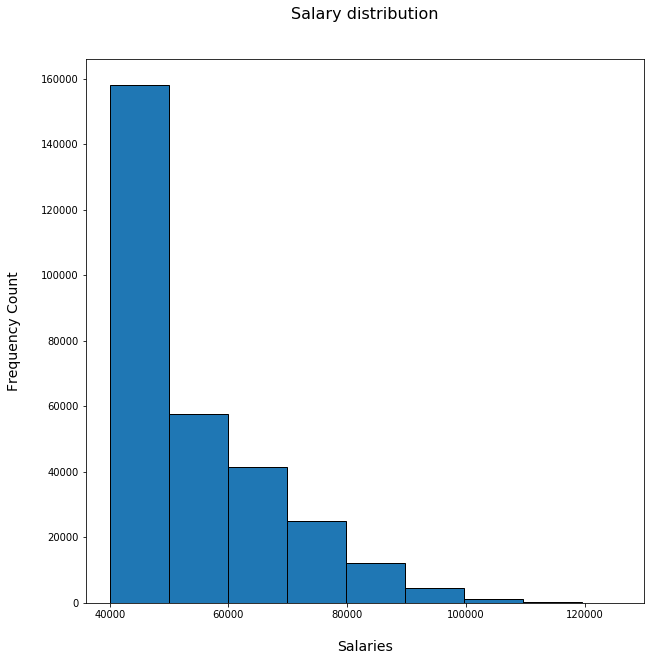

In [28]:
plt.rcParams['figure.figsize']=(10,10)
plt.hist(sal1['salary'],bins=9,alpha=1,edgecolor='black')
plt.title('Salary distribution',fontsize=16,pad=40)
plt.xlabel('Salaries',fontsize=14,labelpad=20)
plt.ylabel('Frequency Count',fontsize=14,labelpad=20)
plt.xlim(36000,130000)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 10. Bar graph to show the Average salary per title (designation)

In [26]:
import pandas as pd

In [134]:
spark.sql("SELECT T.title, avg(SAL.salary) FROM employees EMP inner join titles T on EMP.emp_title_id = T.title_id inner join salaries SAL  on EMP.emp_no = SAL.emp_no group by T.title ").show()

+------------------+------------------+
|             title|       avg(salary)|
+------------------+------------------+
|             Staff| 58465.38285033152|
|Assistant Engineer| 48564.43444730077|
|      Senior Staff| 58550.17270435993|
|   Senior Engineer| 48506.79987109579|
|          Engineer|48535.336511426336|
|           Manager|51531.041666666664|
|  Technique Leader| 48582.89609189332|
+------------------+------------------+



In [138]:
sal = spark.sql("SELECT T.title, avg(SAL.salary) AS avg_salary FROM employees EMP inner join titles T on EMP.emp_title_id = T.title_id inner join salaries SAL  on EMP.emp_no = SAL.emp_no group by T.title ")

In [139]:
avg_sal = sal.toPandas()

In [140]:
avg_sal

,title,avg_salary
0,Staff,58465.382850
1,Assistant Engineer,48564.434447
2,Senior Staff,58550.172704
3,Senior Engineer,48506.799871
4,Engineer,48535.336511
5,Manager,51531.041667
6,Technique Leader,48582.896092


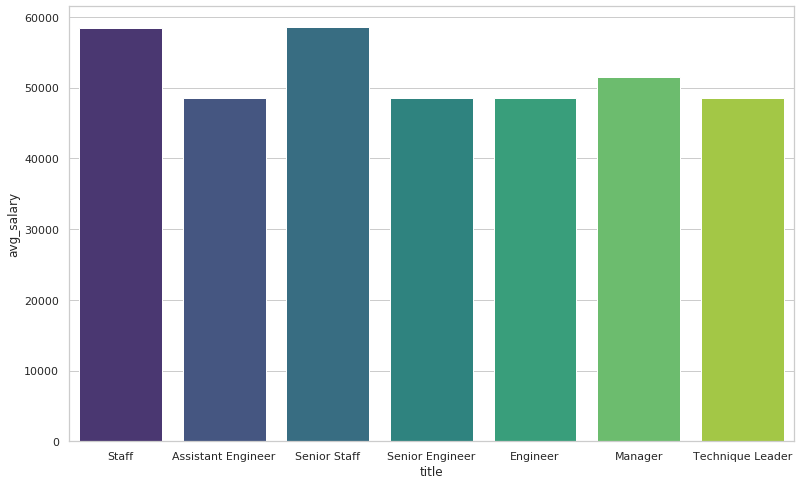

In [147]:
plt.figure(figsize=(13,8))
sns.barplot(x = avg_sal.title, y = avg_sal.avg_salary, palette='viridis')
plt.show()

### 11. Calculate employee tenure & show the tenure distribution among the employees

In [63]:
spark.sql("select t1.first_name,t1.last_name,sum(t2.salary) from employees t1 left join salaries t2 on t1.emp_no = t2.emp_no group by t1.first_name,t1.last_name order by sum(t2.salary) desc").show()

+------------+-------------+-----------+
|  first_name|    last_name|sum(salary)|
+------------+-------------+-----------+
|    Mohammad|       Ullian|     267002|
|      Bartek|      Garnier|     259201|
|     Rosalyn|       Baalen|     257234|
|    Radoslaw|         Pfau|     254066|
|         Gad|        Krone|     251992|
|      Divine|      Ebeling|     248562|
|        Iara|      Breugel|     246766|
|        Eben|    Francisci|     243202|
|    Yonghong|      Codenie|     241874|
|     Zongyan|      DiGiano|     241645|
|   Laurentiu|     Cesareni|     239415|
| Constantijn|     Pramanik|     236752|
|    Yuichiro|      Brendel|     235377|
|    Branimir|     Griswold|     235302|
|    Jasminko|        Junot|     234801|
|      Jaques|       Zaiane|     233109|
|Sivanarayana|Chandrasekhar|     230977|
|    Jasminko|   Goldhammer|     230706|
|     Martijn|   Besancenot|     230697|
|        Marc|       Stille|     228853|
+------------+-------------+-----------+
only showing top

### 12. Count of employee gender distribution

In [6]:
spark.sql("SELECT sex , COUNT(emp_no) FROM employees GROUP BY sex").show()

+---+-------------+
|sex|count(emp_no)|
+---+-------------+
|  F|       120051|
|  M|       179973|
+---+-------------+



In [19]:
ep_gender = spark.sql("SELECT sex , COUNT(emp_no) as Count FROM employees GROUP BY sex")

In [22]:
ep = ep_gender.toPandas()
ep

,sex,Count
0,F,120051
1,M,179973


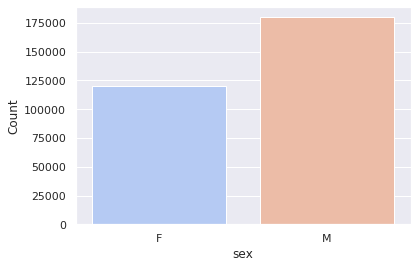

In [25]:
sns.barplot(x = ep.sex, y = ep.Count, palette='coolwarm')
plt.show()

### 13. Count of employees based on rating.

In [43]:
spark.sql("SELECT Last_performance_rating , COUNT(emp_no) FROM employees GROUP BY last_performance_rating").show()

+-----------------------+-------------+
|Last_performance_rating|count(emp_no)|
+-----------------------+-------------+
|                      B|       107154|
|                      C|        71304|
|                      A|        95919|
|                      S|        10542|
|                    PIP|        15105|
+-----------------------+-------------+



In [64]:
rating = spark.sql("SELECT Last_performance_rating , COUNT(emp_no) AS total_employee FROM employees GROUP BY last_performance_rating")

In [65]:
rate = rating.toPandas()

In [66]:
rate

,Last_performance_rating,total_employee
0,B,107154
1,C,71304
2,A,95919
3,S,10542
4,PIP,15105


In [67]:
last_rating = rate.Last_performance_rating
num_of_employees = rate.total_employee

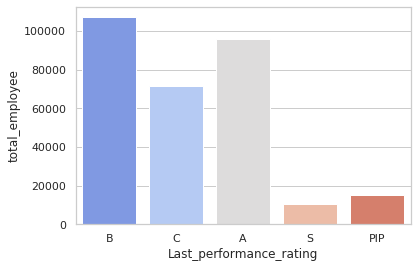

In [76]:
sns.barplot(x = last_rating, y =num_of_employees , palette='coolwarm')
plt.show()

### 14. count of employees according to desingnation

In [77]:
spark.sql("SELECT T.title,COUNT(EMP.emp_no)  FROM titles T INNER JOIN employees EMP ON T.title_id = EMP.emp_title_id GROUP BY(T.title)").show()

+------------------+-------------+
|             title|count(emp_no)|
+------------------+-------------+
|             Staff|       107384|
|Assistant Engineer|         5835|
|      Senior Staff|        26583|
|   Senior Engineer|        97747|
|          Engineer|        47303|
|           Manager|           24|
|  Technique Leader|        15148|
+------------------+-------------+



In [78]:
des = spark.sql("SELECT T.title,COUNT(EMP.emp_no)  FROM titles T INNER JOIN employees EMP ON T.title_id = EMP.emp_title_id GROUP BY(T.title)")

In [81]:
designation = des.toPandas() 

In [82]:
designation

,title,count(emp_no)
0,Staff,107384
1,Assistant Engineer,5835
2,Senior Staff,26583
3,Senior Engineer,97747
4,Engineer,47303
5,Manager,24
6,Technique Leader,15148


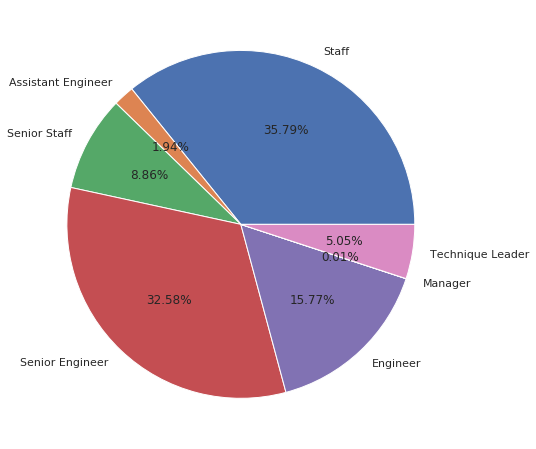

In [114]:
plt.figure(figsize=(10,8))
plt.pie(data = designation, x ='count(emp_no)',autopct='%1.2f%%',labels='title')
plt.show()

### 15. Employees who are registered in more than one department

In [120]:
more = spark.sql("SELECT emp_no, count(emp_no) as frequency FROM dept_emp GROUP BY emp_no having count(emp_no) > 1 ORDER BY frequency DESC").show()

+------+---------+
|emp_no|frequency|
+------+---------+
| 13528|        2|
| 17926|        2|
| 18304|        2|
| 18750|        2|
| 21517|        2|
| 23581|        2|
| 33060|        2|
| 33369|        2|
| 36130|        2|
| 36946|        2|
| 38776|        2|
| 39621|        2|
| 40253|        2|
| 40343|        2|
| 41185|        2|
| 42537|        2|
| 43401|        2|
| 43419|        2|
| 44224|        2|
| 46063|        2|
+------+---------+
only showing top 20 rows



In [125]:
more = spark.sql("select emp_no, count(emp_no) as frequency from dept_emp group by emp_no having count(emp_no) > 1 order by frequency desc")

In [126]:
m1 = more.toPandas()

In [127]:
m1.count()

emp_no       31579
frequency    31579
dtype: int64

### 16. most paid employees.

In [129]:
spark.sql("""SELECT t1.first_name,t1.last_name, SUM(t2.salary) FROM employees t1 
LEFT JOIN salaries t2 
    ON t1.emp_no = t2.emp_no
GROUP BY t1.first_name,t1.last_name
ORDER BY sum(t2.salary) DESC""").show()

+------------+-------------+-----------+
|  first_name|    last_name|sum(salary)|
+------------+-------------+-----------+
|    Mohammad|       Ullian|     267002|
|      Bartek|      Garnier|     259201|
|     Rosalyn|       Baalen|     257234|
|    Radoslaw|         Pfau|     254066|
|         Gad|        Krone|     251992|
|      Divine|      Ebeling|     248562|
|        Iara|      Breugel|     246766|
|        Eben|    Francisci|     243202|
|    Yonghong|      Codenie|     241874|
|     Zongyan|      DiGiano|     241645|
|   Laurentiu|     Cesareni|     239415|
| Constantijn|     Pramanik|     236752|
|    Yuichiro|      Brendel|     235377|
|    Branimir|     Griswold|     235302|
|    Jasminko|        Junot|     234801|
|      Jaques|       Zaiane|     233109|
|Sivanarayana|Chandrasekhar|     230977|
|    Jasminko|   Goldhammer|     230706|
|     Martijn|   Besancenot|     230697|
|        Marc|       Stille|     228853|
+------------+-------------+-----------+
only showing top